# Build a Traffic Sign Recognition Classifier

## Load The Data

here is the [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580d53ce_traffic-sign-data/traffic-sign-data.zip)

In [1]:
import requests 
import os
url = "https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580d53ce_traffic-sign-data/traffic-sign-data.zip"
r = requests.get(url)

In [2]:
with open("dataset.zip",'wb') as f:
    f.write(r.content)

In [3]:
import zipfile
z = zipfile.ZipFile('dataset.zip', mode='r')
for file in z.namelist():
    print(file)
    z.extract(file,"./")

lab 2 data/changelog.docx
lab 2 data/test.p
lab 2 data/train.p


In [1]:
# Load pickled data
import pickle

training_file = "./lab 2 data/train.p"
testing_file = "./lab 2 data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Dataset Summary

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 

### Split the test data to validation and test data

In [2]:
from sklearn.model_selection import train_test_split
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test)

In [3]:
n_train = len(X_train)
n_validate = len(X_validation)
n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validate)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of validation examples = 9472
Number of testing examples = 3158
Image data shape = (32, 32, 3)
Number of classes = 43


### Preprocess label to get one hot form

In [4]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([num for num in range(43)])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [5]:
y_train_onehot = lb.transform(y_train)
y_validation_onehot = lb.transform(y_validation)
y_test_onehot = lb.transform(y_test)

### Take a look at the dataset

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

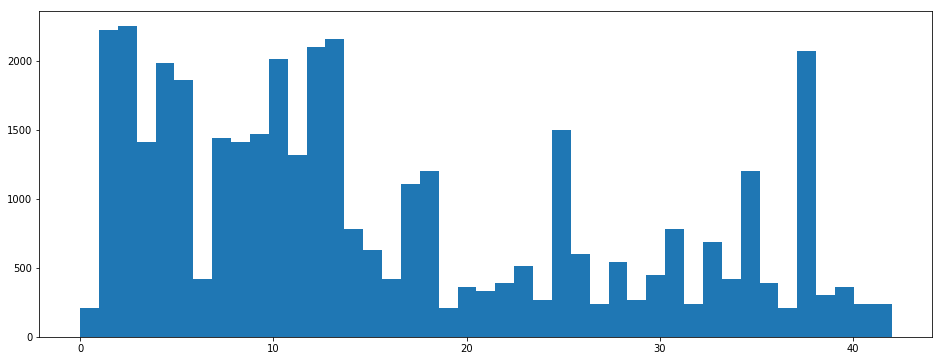

In [7]:
plt.figure(figsize=(16, 6))
plt.hist(y_train, bins=43)

(array([  17.,  181.,  173.,   97.,  174.,  162.,   35.,  113.,  116.,
         119.,  176.,  111.,  169.,  154.,   78.,   49.,   39.,   98.,
         110.,   21.,   20.,   22.,   34.,   41.,   22.,  115.,   52.,
          10.,   39.,   17.,   39.,   71.,   16.,   40.,   33.,   88.,
          22.,   15.,  183.,   27.,   22.,   18.,   20.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

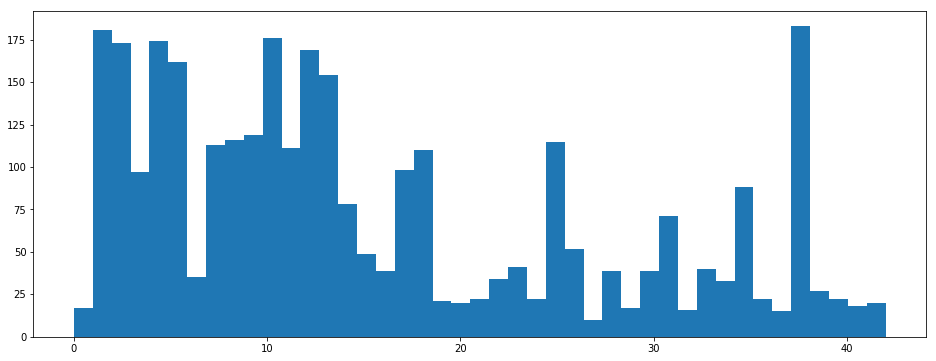

In [8]:
plt.figure(figsize=(16, 6))
plt.hist(y_test, bins=43)

----

## Design and Test a Model Architecture

### Pre-process the Data Set

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [9]:
import numpy as np

def norm_preprocess(img):
     return (img - 128)/128

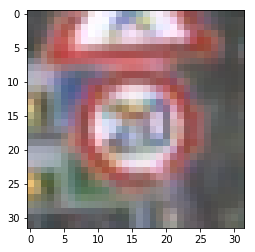

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train_norm = [norm_preprocess(img) for img in X_train]
X_validation_norm = [norm_preprocess(img) for img in X_validation]
X_test_norm = [norm_preprocess(img) for img in X_test]

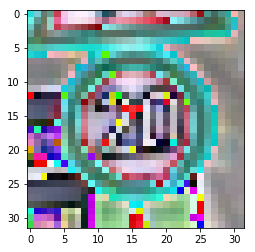

In [12]:
plt.imshow(X_train_norm[10])

In [13]:
X_train_norm = np.array(X_train_norm)
X_validation_norm = np.array(X_validation_norm)
X_test_norm = np.array(X_test_norm)

In [14]:
X_train_norm.shape

(39209, 32, 32, 3)

### Model Architecture

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [16]:
batch_size = 128
num_classes = 43
epochs = 12

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=True)

In [17]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
model.fit(X_train_norm, y_train_onehot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_validation_norm, y_validation_onehot),
          callbacks=[tensorboard])

Train on 39209 samples, validate on 9472 samples
Epoch 1/12
39209/39209 [==============================] - 82s - loss: 3.0929 - acc: 0.1673 - val_loss: 2.1541 - val_acc: 0.3780
Epoch 2/12
39209/39209 [==============================] - 82s - loss: 1.5510 - acc: 0.5238 - val_loss: 1.0472 - val_acc: 0.6703
Epoch 3/12
39209/39209 [==============================] - 83s - loss: 0.8277 - acc: 0.7368 - val_loss: 0.7365 - val_acc: 0.7669
Epoch 4/12
39209/39209 [==============================] - 83s - loss: 0.5378 - acc: 0.8237 - val_loss: 0.5616 - val_acc: 0.8197
Epoch 5/12
39209/39209 [==============================] - 83s - loss: 0.3927 - acc: 0.8718 - val_loss: 0.5147 - val_acc: 0.8415
Epoch 6/12
39209/39209 [==============================] - 84s - loss: 0.3105 - acc: 0.9005 - val_loss: 0.4800 - val_acc: 0.8520
Epoch 7/12
39209/39209 [==============================] - 83s - loss: 0.2582 - acc: 0.9166 - val_loss: 0.4379 - val_acc: 0.8669
Epoch 8/12
39209/39209 [==============================]

In [21]:
score = model.evaluate(X_test_norm, y_test_onehot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.345812330882
Test accuracy: 0.896453451627


---

## Test a Model on New Images

I use 5 images from the Internet to test the performance of the model

### Load and Output the Images

In [22]:
import os
test_img_path = './test_img'
test_img_paths = os.listdir(test_img_path)

### Predict the Sign Type for Each Image

In [23]:
test_img_paths = [(test_img_path + '/' + path) for path in test_img_paths]

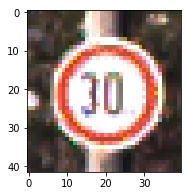

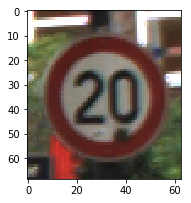

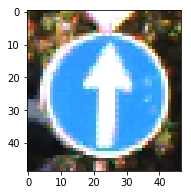

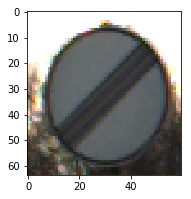

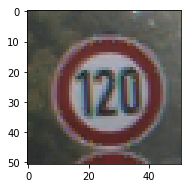

In [39]:
for i, path in enumerate(test_img_paths, 1):
    plt.figure(figsize=(16,6))
    img = plt.imread(path)
    plt.subplot(1,5,i)
    plt.imshow(img)
plt.show()

In [40]:
output = []
for i, path in enumerate(test_img_paths, 1):
    img = plt.imread(path)
    img = img[2:34, 2:34]
    norm_img = norm_preprocess(img).reshape([1,32,32,3])
    output.append(model.predict(norm_img).argmax())
print(output)

[4, 32, 38, 34, 17]


In [29]:
import pandas as pd
df = pd.read_csv('./signnames.csv')

In [41]:
for num in output:
    print(df.query('ClassId ==' + str(num)))

   ClassId              SignName
4        4  Speed limit (70km/h)
    ClassId                             SignName
32       32  End of all speed and passing limits
    ClassId    SignName
38       38  Keep right
    ClassId         SignName
34       34  Turn left ahead
    ClassId  SignName
17       17  No entry


### Analyze Performance
It seems that the result is rather bad, not consist with the accuracy it performed during the training and test process